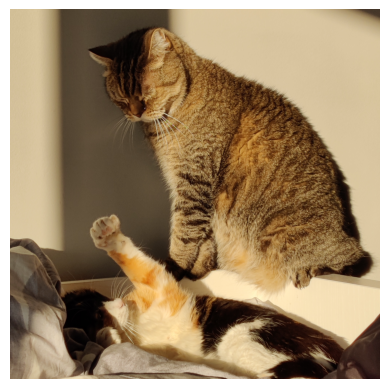

In [1]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread("demos/cat.png")
plt.imshow(img)
plt.axis("off")
plt.show()

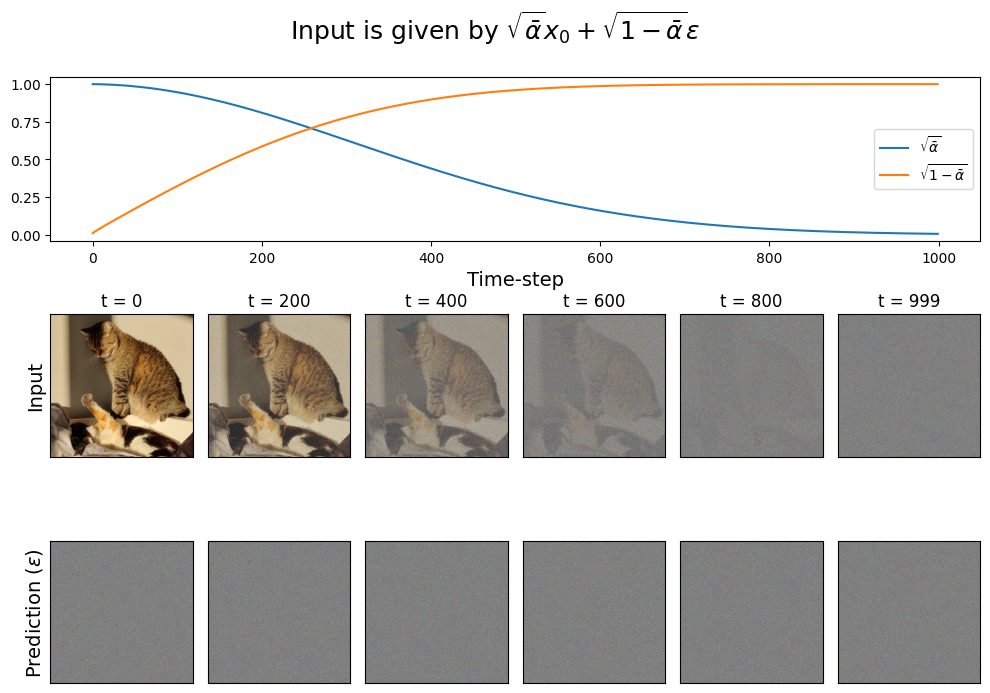

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
betas = np.linspace(1e-4, 0.02, 1000)
alphas = 1 - betas
alphas_bar = np.cumprod(alphas, axis=0)

t = np.arange(1000)
image_coefficient = np.sqrt(alphas_bar)
noise_coefficient = np.sqrt(1 - alphas_bar)

fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(3, 6, height_ratios=[1, 1, 1])
fig.suptitle(r"Input is given by $\sqrt{\bar{\alpha}} x_0 + \sqrt{1 - \bar{\alpha}} \epsilon$", fontsize=18, y=1)

# First row: single plot spanning 6 columns
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(t, image_coefficient, label=r"$\sqrt{\bar{\alpha}}$")
ax1.plot(t, noise_coefficient, label=r"$\sqrt{1 - \bar{\alpha}}$")
ax1.set_xlabel("Time-step", fontsize=14)
ax1.legend()

# Time steps for the images
ts = (0, 200, 400, 600, 800, 999)

for i, t in enumerate(ts):
    # img = np.random.uniform(size=(25,25))
    noise = np.random.normal(size=img.shape)
    noisy_image = np.sqrt(alphas_bar[t]) * (img * 2 - 1) + np.sqrt(1 - alphas_bar[t]) * noise
    
    ax_input = fig.add_subplot(gs[1, i])
    ax_input.imshow(np.clip((noisy_image + 1) / 2, 0, 1))
    ax_input.set_title(f"t = {t}", fontsize=12)
    ax_input.set_xticks([])
    ax_input.set_yticks([])
    
    ax_output = fig.add_subplot(gs[2, i])
    ax_output.imshow(np.clip((noise + 1) / 2, 0, 1))
    ax_output.set_xticks([])
    ax_output.set_yticks([])
    
    if i == 0:
        ax_input.set_ylabel("Input", fontsize=14)
        ax_output.set_ylabel(r"Prediction ($\epsilon$)", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.savefig("images/trend_explanation.pdf")
plt.show()